#biar cepet

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [29]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


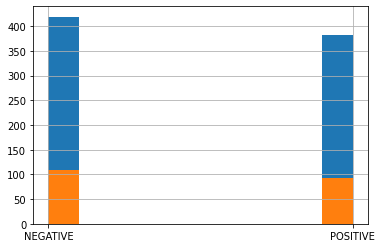

In [30]:
#Diagram Untuk melihat Perbandingan antara Class data data training dan testing  dan pembuatan data testing pada Test size sebesar 0.2 atau 20% dan otomatis data training 0.8 80%
x_train, x_test, y_train, y_test = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)
y_train.hist()
y_test.hist()

In [31]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(y_train)
test_y = Encoder.transform(y_test)

In [32]:
#membuat CountVectorizer dengan menggunakan Unigram+bigram
cv = CountVectorizer(ngram_range=(3,3)) #1 = uni // 2 = bi // 3 = tri
cv.fit_transform(x_train)
len(cv.get_feature_names_out())

12948

In [33]:
print("Vocabulary: ", cv.vocabulary_)

Vocabulary:  {'tokopedia repot seleksi': 12014, 'repot seleksi orang': 9824, 'seleksi orang buka': 10357, 'orang buka toko': 8437, 'buka toko beli': 2800, 'toko beli barang': 11461, 'beli barang kirim': 2345, 'barang kirim produk': 1350, 'kirim produk kirim': 6329, 'produk kirim sesuai': 9405, 'kirim sesuai prosedur': 6357, 'sesuai prosedur prosedur': 10502, 'prosedur prosedur susah': 9588, 'prosedur susah pesan': 9589, 'susah pesan sedia': 10892, 'pesan sedia barang': 9094, 'sedia barang member': 10321, 'barang member gold': 1396, 'member gold silver': 7520, 'gold silver turun': 4184, 'silver turun hapus': 10592, 'turun hapus pasang': 12433, 'beli bayar alfamart': 2362, 'bayar alfamart kena': 1782, 'alfamart kena biaya': 256, 'kena biaya administrasi': 5885, 'biaya administrasi bayar': 2588, 'administrasi bayar menit': 27, 'bayar menit transaksi': 1933, 'menit transaksi batal': 7548, 'transaksi batal tokopedia': 12248, 'batal tokopedia dana': 1721, 'tokopedia dana ubah': 11719, 'dana 

In [34]:
#memanggil Nama fitur
gf = cv.get_feature_names_out()
print(gf)

['abai abai ikut' 'abai administrasi april' 'abai baik larut' ...
 'youtube pesan bantu' 'zakat suka bangga' 'zoning jaring salah']


In [35]:
X_train = cv.fit_transform(x_train)
X_test = cv.transform(x_test)

In [36]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (800, 12948)
X_test_shape :  (200, 12948)
y_train_shape :  (800,)
y_test_shape :  (200,)


In [37]:
print("x_train : \n",X_train)
print("\n x_test : \n",X_test)
print("\n y_train : \n",train_y)
print("\n y_test : \n",test_y)

x_train : 
   (0, 12014)	1
  (0, 9824)	1
  (0, 10357)	1
  (0, 8437)	1
  (0, 2800)	1
  (0, 11461)	1
  (0, 2345)	1
  (0, 1350)	1
  (0, 6329)	1
  (0, 9405)	1
  (0, 6357)	1
  (0, 10502)	1
  (0, 9588)	1
  (0, 9589)	1
  (0, 10892)	1
  (0, 9094)	1
  (0, 10321)	1
  (0, 1396)	1
  (0, 7520)	1
  (0, 4184)	1
  (0, 10592)	1
  (0, 12433)	1
  (1, 2362)	1
  (1, 1782)	1
  (1, 256)	1
  :	:
  (798, 10290)	1
  (798, 12482)	1
  (798, 8635)	1
  (798, 9483)	1
  (798, 3553)	1
  (798, 2386)	1
  (798, 3979)	1
  (798, 813)	1
  (798, 10687)	1
  (799, 10994)	2
  (799, 7563)	2
  (799, 5207)	1
  (799, 5983)	1
  (799, 3850)	1
  (799, 7924)	1
  (799, 8068)	1
  (799, 3202)	1
  (799, 2713)	1
  (799, 10725)	1
  (799, 5211)	1
  (799, 5987)	1
  (799, 8210)	1
  (799, 10600)	1
  (799, 7961)	1
  (799, 12692)	1

 x_test : 
   (1, 1494)	1
  (2, 3677)	1
  (2, 4282)	1
  (3, 1011)	1
  (3, 2291)	1
  (3, 11841)	1
  (3, 12171)	1
  (4, 1163)	1
  (4, 11253)	1
  (6, 6490)	1
  (6, 12479)	1
  (7, 4385)	1
  (8, 3674)	1
  (8, 3697)	1
  (9, 

#Multinomial Naive Bayes

In [38]:
MNB = MultinomialNB()
MNB.fit(X_train, train_y)

MultinomialNB()

In [39]:
scores = cross_val_score(MNB, X_train, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, X_train, train_y, cv=10).mean())

[0.5125 0.5    0.5    0.5    0.4875 0.4625 0.5    0.525  0.4875 0.5625]
K-Fold Mean ->  0.5037499999999999


In [40]:
MNB_pred = MNB.predict(X_test)

In [41]:
MNB_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1])

In [42]:
print(confusion_matrix(MNB_pred, test_y))
print("MNB Accuracy Score -> ",accuracy_score(test_y, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(test_y, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(test_y, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(test_y, MNB_pred)*100)

[[83 38]
 [25 54]]
MNB Accuracy Score ->  68.5
MNB Recall Score ->  58.69565217391305
MNB Precision Score ->  68.35443037974683
MNB f1 Score ->  63.15789473684211


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.72       108
           1       0.68      0.59      0.63        92

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.69      0.68       200


Confusion Matrix:


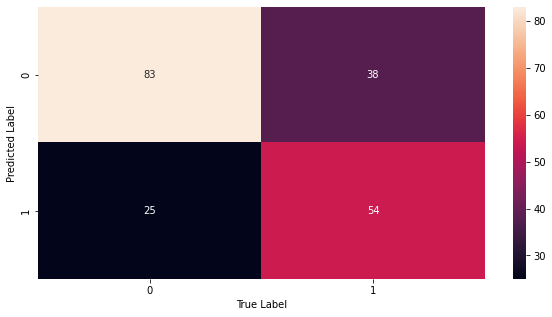



True Positive :  54
True Negative :  83
False Positive :  25
False Negative  :  38


In [43]:
print("Classification Report:")
print(classification_report(test_y, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [44]:
mae = mean_absolute_error(test_y, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.315


In [45]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_svm

,prediksi
0,60.50%
1,39.50%


#Bernoulli Naive Bayes

In [46]:
BNB = BernoulliNB()
BNB.fit(X_train, train_y)

BernoulliNB()

In [47]:
scores = cross_val_score(BNB, X_train, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, X_train, train_y, cv=10).mean())

[0.475  0.5125 0.4875 0.4875 0.475  0.475  0.4875 0.5    0.475  0.5375]
K-Fold Mean ->  0.49124999999999996


In [48]:
BNB_pred = BNB.predict(X_test)

In [49]:
print(confusion_matrix(BNB_pred, test_y))
print("BNB Accuracy Score -> ",accuracy_score(test_y, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(test_y, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(test_y, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(test_y, BNB_pred)*100)

[[24  1]
 [84 91]]
BNB Accuracy Score ->  57.49999999999999
BNB Recall Score ->  98.91304347826086
BNB Precision Score ->  52.0
BNB f1 Score ->  68.16479400749064


In [83]:
BNB_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1])

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.22      0.36       108
           1       0.52      0.99      0.68        92

    accuracy                           0.57       200
   macro avg       0.74      0.61      0.52       200
weighted avg       0.76      0.57      0.51       200


Confusion Matrix:


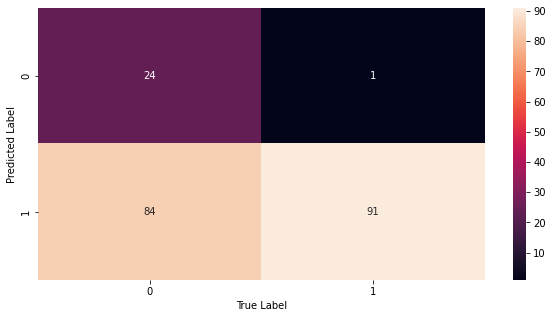



True Positive :  91
True Negative :  24
False Positive :  84
False Negative  :  1


In [50]:
print("Classification Report:")
print(classification_report(test_y, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [51]:
mae = mean_absolute_error(test_y, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.425


In [52]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_svm

,prediksi
1,87.50%
0,12.50%


#Hitung nilai C

In [53]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2, 2.01, 2.05, 2.25, 2.5, 3]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(X_train, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(X_test)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.53
Accuracy fot C=0.25: 0.46
Accuracy fot C=0.5: 0.46
Accuracy fot C=1: 0.46
Accuracy fot C=1.01: 0.46
Accuracy fot C=1.05: 0.46
Accuracy fot C=1.25: 0.46
Accuracy fot C=1.5: 0.46
Accuracy fot C=2: 0.46
Accuracy fot C=2.01: 0.46
Accuracy fot C=2.05: 0.46
Accuracy fot C=2.25: 0.46
Accuracy fot C=2.5: 0.46
Accuracy fot C=3: 0.46


# Linear

In [54]:
linear = SVC(kernel='linear', C=0.01)
linear.fit(X_train, train_y)

SVC(C=0.01, kernel='linear')

In [55]:
scores = cross_val_score(linear, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,X_train, train_y, cv=10).mean())

[0.525  0.5375 0.55   0.525  0.525  0.525  0.5125 0.525  0.525  0.5125]
K-Fold Mean ->  0.5262500000000001


In [56]:
linear_pred = linear.predict(X_test)

In [57]:
linear_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [58]:
print(confusion_matrix(linear_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, linear_pred)*100)

[[108  92]
 [  0   0]]
SVM Accuracy Score ->  54.0
SVM Recall Score ->  0.0
SVM Precision Score ->  0.0
SVM f1 Score ->  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200


Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


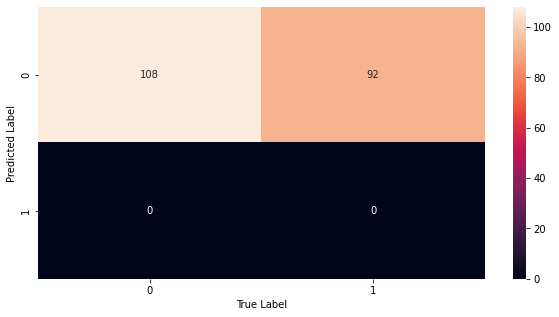



True Positive :  0
True Negative :  108
False Positive :  0
False Negative  :  92


In [59]:
print("Classification Report:")
print(classification_report(test_y, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [60]:
mae = mean_absolute_error(test_y, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.46


In [61]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_svm

,prediksi
0,100.00%


# Polynomial 

In [62]:
poly = SVC(kernel='poly', C=0.01)
poly.fit(X_train, train_y)

SVC(C=0.01, kernel='poly')

In [63]:
scores = cross_val_score(poly, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,X_train, train_y, cv=10).mean())

[0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.5125]
K-Fold Mean ->  0.52375


In [64]:
poly_pred = poly.predict(X_test)

In [65]:
print(confusion_matrix(poly_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, poly_pred)*100)

[[108  92]
 [  0   0]]
SVM Accuracy Score ->  54.0
SVM Recall Score ->  0.0
SVM Precision Score ->  0.0
SVM f1 Score ->  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200


Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


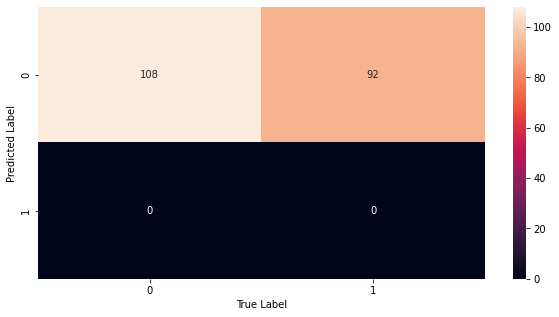



True Positive :  0
True Negative :  108
False Positive :  0
False Negative  :  92


In [66]:
print("Classification Report:")
print(classification_report(test_y, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [67]:
mae = mean_absolute_error(test_y, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.46


In [68]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_svm

,prediksi
0,100.00%


# Radial Basis Function

In [69]:
rbf = SVC(kernel='rbf', C=0.01, gamma=0.50 )
rbf.fit(X_train, train_y)

SVC(C=0.01, gamma=0.5)

In [70]:
scores = cross_val_score(rbf, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,X_train, train_y, cv=10).mean())

[0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.5125]
K-Fold Mean ->  0.52375


In [71]:
rbf_pred = rbf.predict(X_test)

In [72]:
print(confusion_matrix(rbf_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, rbf_pred)*100)

[[108  92]
 [  0   0]]
SVM Accuracy Score ->  54.0
SVM Recall Score ->  0.0
SVM Precision Score ->  0.0
SVM f1 Score ->  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200


Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


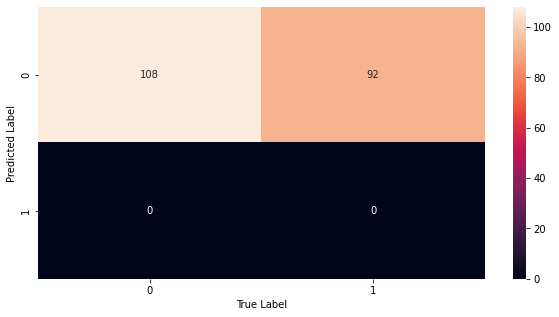



True Positive :  0
True Negative :  108
False Positive :  0
False Negative  :  92


In [73]:
print("Classification Report:")
print(classification_report(test_y, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [74]:
mae = mean_absolute_error(test_y, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.46


In [75]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_svm

,prediksi
0,100.00%


# Sigmoid

In [76]:
sig = SVC(kernel='sigmoid', C=0.01)
sig.fit(X_train, train_y)

SVC(C=0.01, kernel='sigmoid')

In [77]:
scores = cross_val_score(sig, X_train, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,X_train, train_y, cv=10).mean())

[0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.525  0.5125]
K-Fold Mean ->  0.52375


In [78]:
sig_pred = sig.predict(X_test)

In [79]:
print(confusion_matrix(sig_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, sig_pred)*100)

[[108  92]
 [  0   0]]
SVM Accuracy Score ->  54.0
SVM Recall Score ->  0.0
SVM Precision Score ->  0.0
SVM f1 Score ->  0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       108
           1       0.00      0.00      0.00        92

    accuracy                           0.54       200
   macro avg       0.27      0.50      0.35       200
weighted avg       0.29      0.54      0.38       200


Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


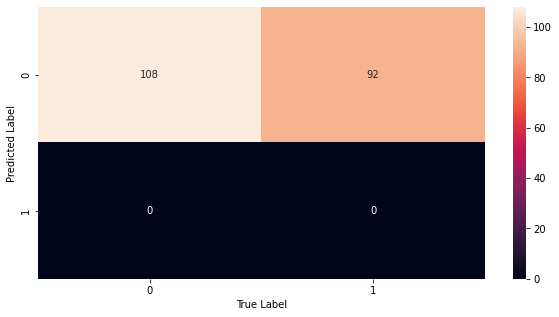



True Positive :  0
True Negative :  108
False Positive :  0
False Negative  :  92


In [80]:
print("Classification Report:")
print(classification_report(test_y, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [81]:
mae = mean_absolute_error(test_y, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.46


In [82]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_svm = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_svm

,prediksi
0,100.00%
